# ROMY - Barometer

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

from functions.baroseis import baroseis

In [2]:
# Configuration dictionary
config = {

    # station parameters
    'station_latitude': 48.162941,
    'station_longitude': 11.275501,
    'station_elevation': 560.0,

    # set time window
    'time_buffer': 3600.0,  # Time buffer in seconds

    # processing parameters
    'sampling_rate': 1.0,  # Sampling rate of common stream in Hz

    # channel configurations
    'baro_seed': "BW.FFBI.30.BDO",
    'seis_seeds': ["BW.ROMY.40.BJZ", "BW.ROMY.40.BJN", "BW.ROMY.40.BJE"],
    # 'seis_seeds': ["BW.ROMY.00.BJZ", "BW.ROMY.00.BJN", "BW.ROMY.00.BJE"],
    # 'seis_seeds': ["BW.DROMY..HHZ", "BW.DROMY..HHN", "BW.DROMY..HHE"],

    # path to station metadata
    'baro_inventory': "./data/station_BW_FFBI.xml",
    'seis_inventory': "./data/station_BW_ROMY.xml",
    # 'seis_inventory': "./data/station_BW_DROMY.xml",

    # data source
    'data_source': 'sds',  # 'sds' or 'mseed_file' or 'mseed_online'

    # path to data archive
    'path_to_baro_data': "/home/andbro/freenas/temp_archive/",
    'path_to_seis_data': "/home/andbro/freenas/temp_archive/",

    # verbosity
    'verbose': True,

    # path to output
    'path_to_figures': './figures',

    # metadata correction
    'metadata_correction': True,

    # remove baro response
    'remove_baro_response': False,

    # remove seis sensitivity
    'remove_seis_sensitivity': False,

    # remove seis response
    'remove_seis_response': True,
}



In [ ]:
# Initialize baroseis object
bs = baroseis(conf=config)

# Can also override time window
# bs.load_data(
#     tbeg="2025-02-20 07:00",
#     tend="2025-02-20 10:00",
# )

# bs.load_data(
#     tbeg="2024-04-23 02:00",
#     tend="2024-04-23 05:00",
# )

# good event
bs.load_data(
    tbeg="2024-03-15 15:00",
    tend="2024-03-15 18:00",
)

# good event
# bs.load_data(
#     tbeg="2024-03-24 15:00",
#     tend="2024-03-24 17:00",
# )


Using default value for out_seed: None

Configuration:
tbeg: None
tend: None
station_latitude: 48.162941
station_longitude: 11.275501
station_elevation: 560.0
time_buffer: 3600.0
sampling_rate: 1.0
fmin: 0.0001
fmax: 0.01
win_length_sec: 300.0
overlap: 0.5
step: 1
cc_threshold: 0.7
path_to_baro_data: /home/andbro/freenas/temp_archive/
path_to_seis_data: /home/andbro/freenas/temp_archive/
baro_inventory: ./data/station_BW_FFBI.xml
seis_inventory: ./data/station_BW_ROMY.xml
metadata_correction: True
data_source: sds
fdsn_server: None
baro_seed: BW.FFBI.30.BDO
seis_seeds: ['BW.ROMY.40.BJZ', 'BW.ROMY.40.BJN', 'BW.ROMY.40.BJE']
verbose: True
path_to_figures: ./figures
out_seed: None
remove_baro_response: False
remove_seis_sensitivity: False
remove_seis_response: True
Loading data from SDS archive...
Loaded barometer: BW.FFBI.30.BDO
Loaded seismometer: BW.ROMY.40.BJZ
Loaded seismometer: BW.ROMY.40.BJN
Loaded seismometer: BW.ROMY.40.BJE
 -> Warning: Sampling rate mismatch: BW.ROMY.40.BJE
 -> 

In [4]:
bs.filter_data(fmin=0.0005, fmax=0.01)

Processing data...
Removing mean and trend...
Applying bandpass filter: 0.0005-0.01 Hz


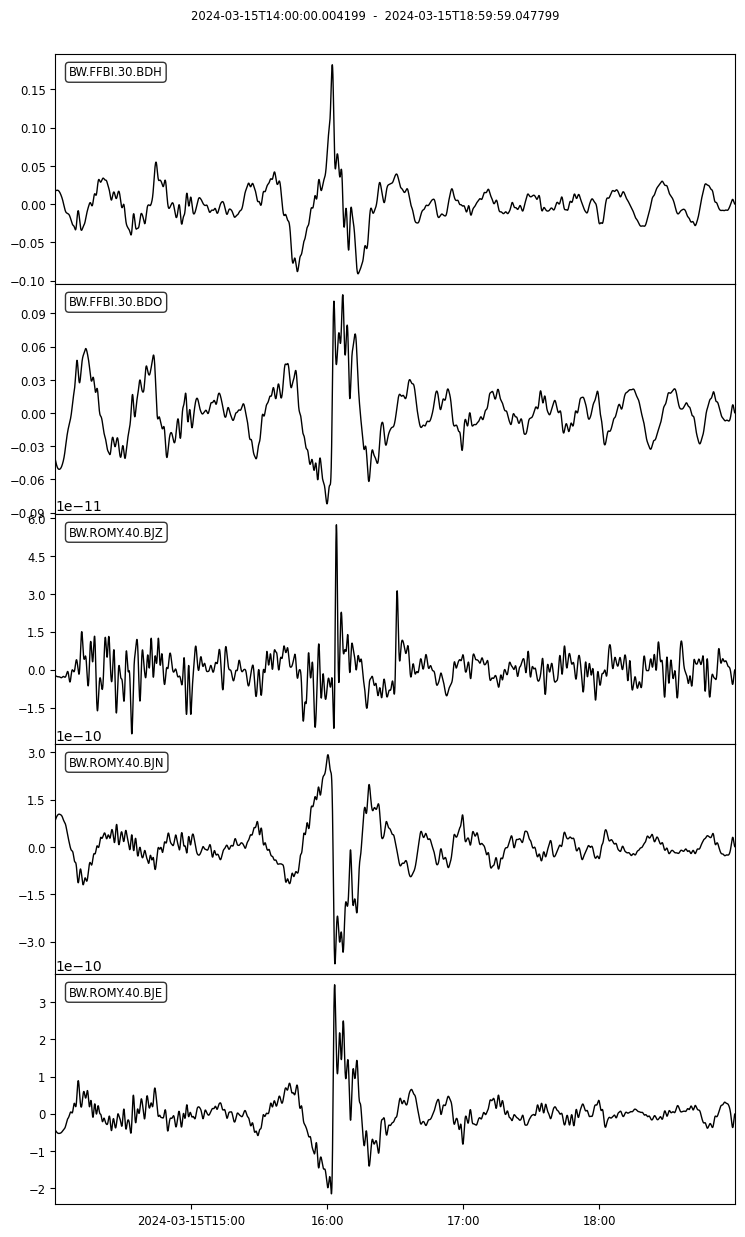

In [5]:
bs.st.plot(equal_scale=False);

 -> Integrating BW.ROMY.40.BJE
 -> Integrating BW.ROMY.40.BJN
 -> Integrating BW.ROMY.40.BJZ


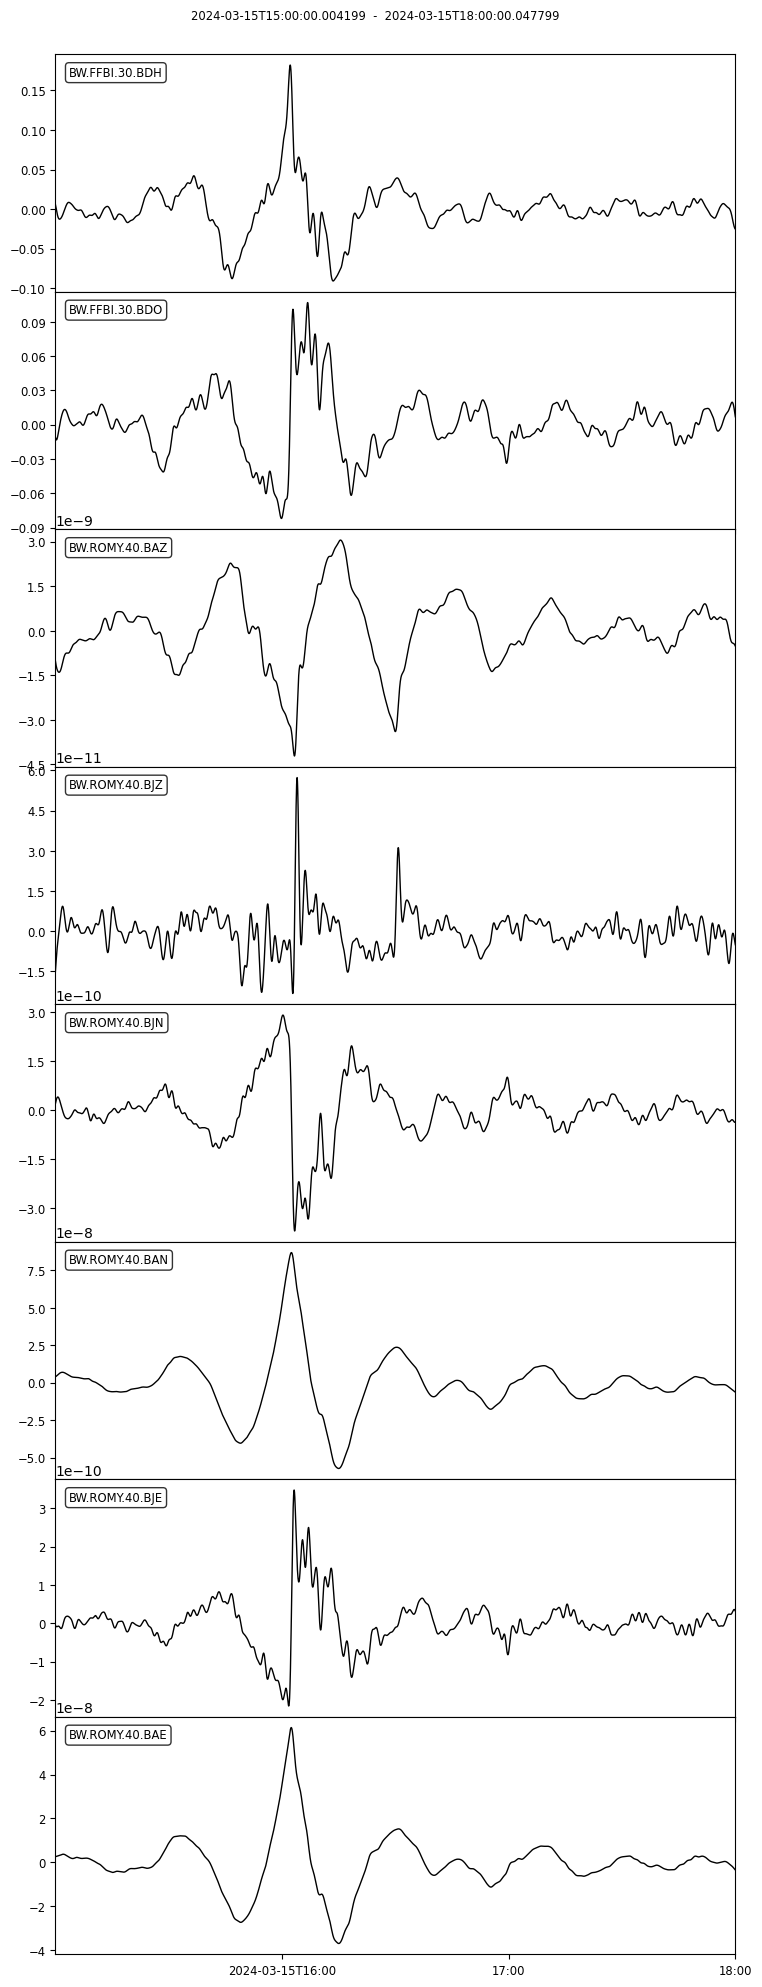

In [6]:
# integrate rotation to tilt
# bs.integrate_data(method="spline")
bs.integrate_data(method="cumtrapz")

# trim waveforms
bs.st = bs.st.trim(bs.config['tbeg'], bs.config['tend'])

# show new waveforms
bs.st.plot(equal_scale=False);


BW.ROMY.40.BJE | 2024-03-15T15:00:00.047799Z - 2024-03-15T18:00:00.047799Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BJN | 2024-03-15T15:00:00.012800Z - 2024-03-15T18:00:00.012800Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BJZ | 2024-03-15T15:00:00.004199Z - 2024-03-15T18:00:00.004199Z | 1.0 Hz, 10801 samples


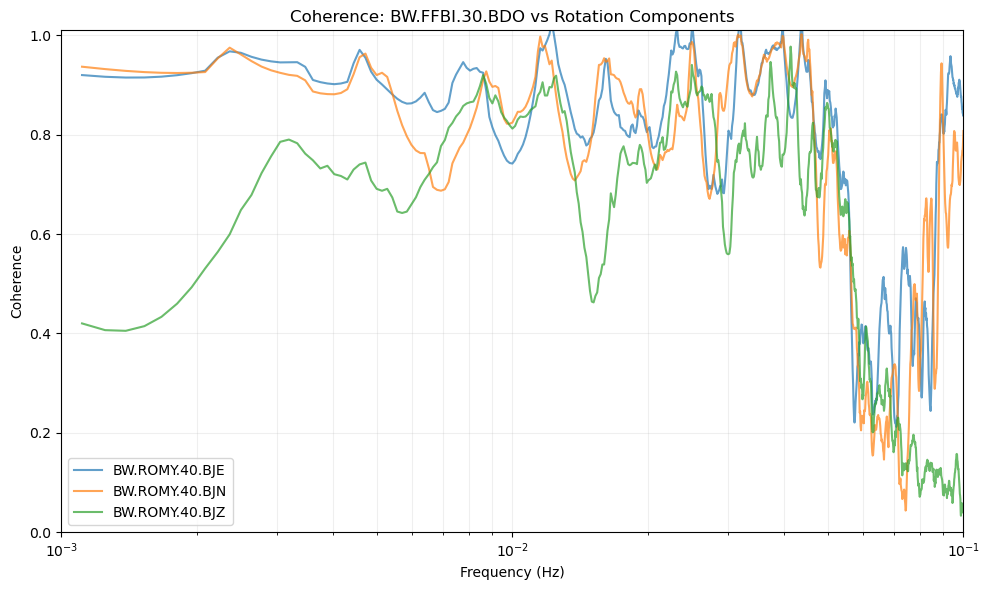

In [7]:
# compute coherence
coherence = bs.compute_coherence(
    window_sec=2*3600,  # 1 hour windows
    overlap=0.5,      # 50% overlap
    smooth_points=31, # Smoothing window
    baro_channel="BDO"
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.001,
    fmax=0.1,
    out=True,
)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdo_coherence.png")

BW.ROMY.40.BJE | 2024-03-15T15:00:00.047799Z - 2024-03-15T18:00:00.047799Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BJN | 2024-03-15T15:00:00.012800Z - 2024-03-15T18:00:00.012800Z | 1.0 Hz, 10801 samples
BW.ROMY.40.BJZ | 2024-03-15T15:00:00.004199Z - 2024-03-15T18:00:00.004199Z | 1.0 Hz, 10801 samples


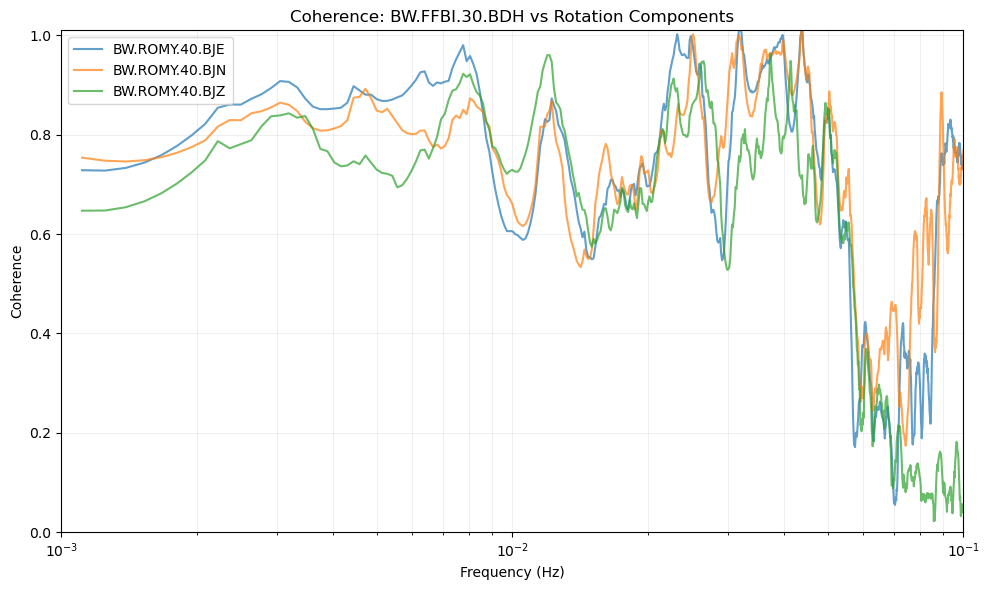

In [8]:
# compute coherence
coherence = bs.compute_coherence(
    window_sec=2*3600,  # 1 hour windows
    overlap=0.5,      # 50% overlap
    smooth_points=31, # Smoothing window
    baro_channel="BDH"
)

# plot results
fig = bs.plot_coherence(
    coherence,
    fmin=0.001,
    fmax=0.1,
    out=True,
)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_bdh_coherence.png")

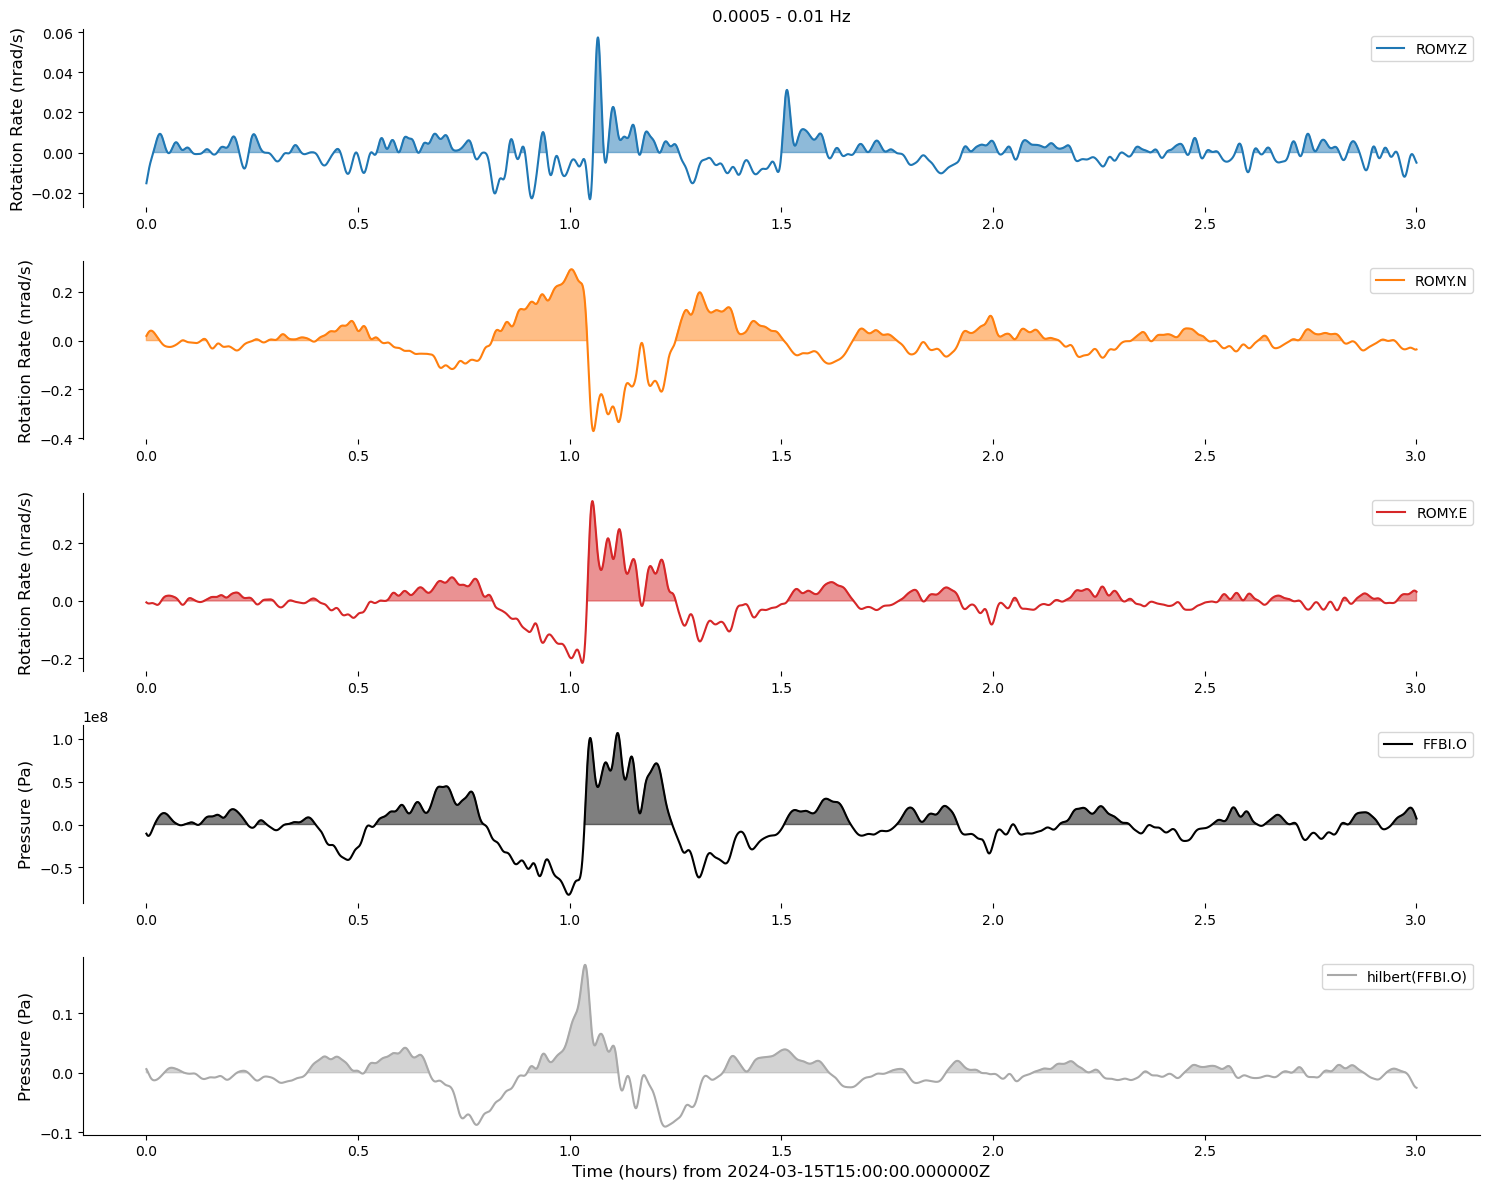

In [20]:
fig = bs.plot_waveforms(bs.st, tunit="hours")

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_waveforms.png")

Make prediction for rotation rate


Component N:
P coefficient: -0.000 nrad/s/hPa
H coefficient: 0.000 nrad/s/hPa
Variance reduction: 91.2%

Component E:
P coefficient: 0.000 nrad/s/hPa
H coefficient: -0.000 nrad/s/hPa
Variance reduction: 87.8%

Component Z:
P coefficient: 0.000 nrad/s/hPa
H coefficient: 0.000 nrad/s/hPa
Variance reduction: 16.1%
-303.02256866159536 27.882606819085332
207.2708322436376 -21.42843761897195
10.478247235290048 1.9877887768485303


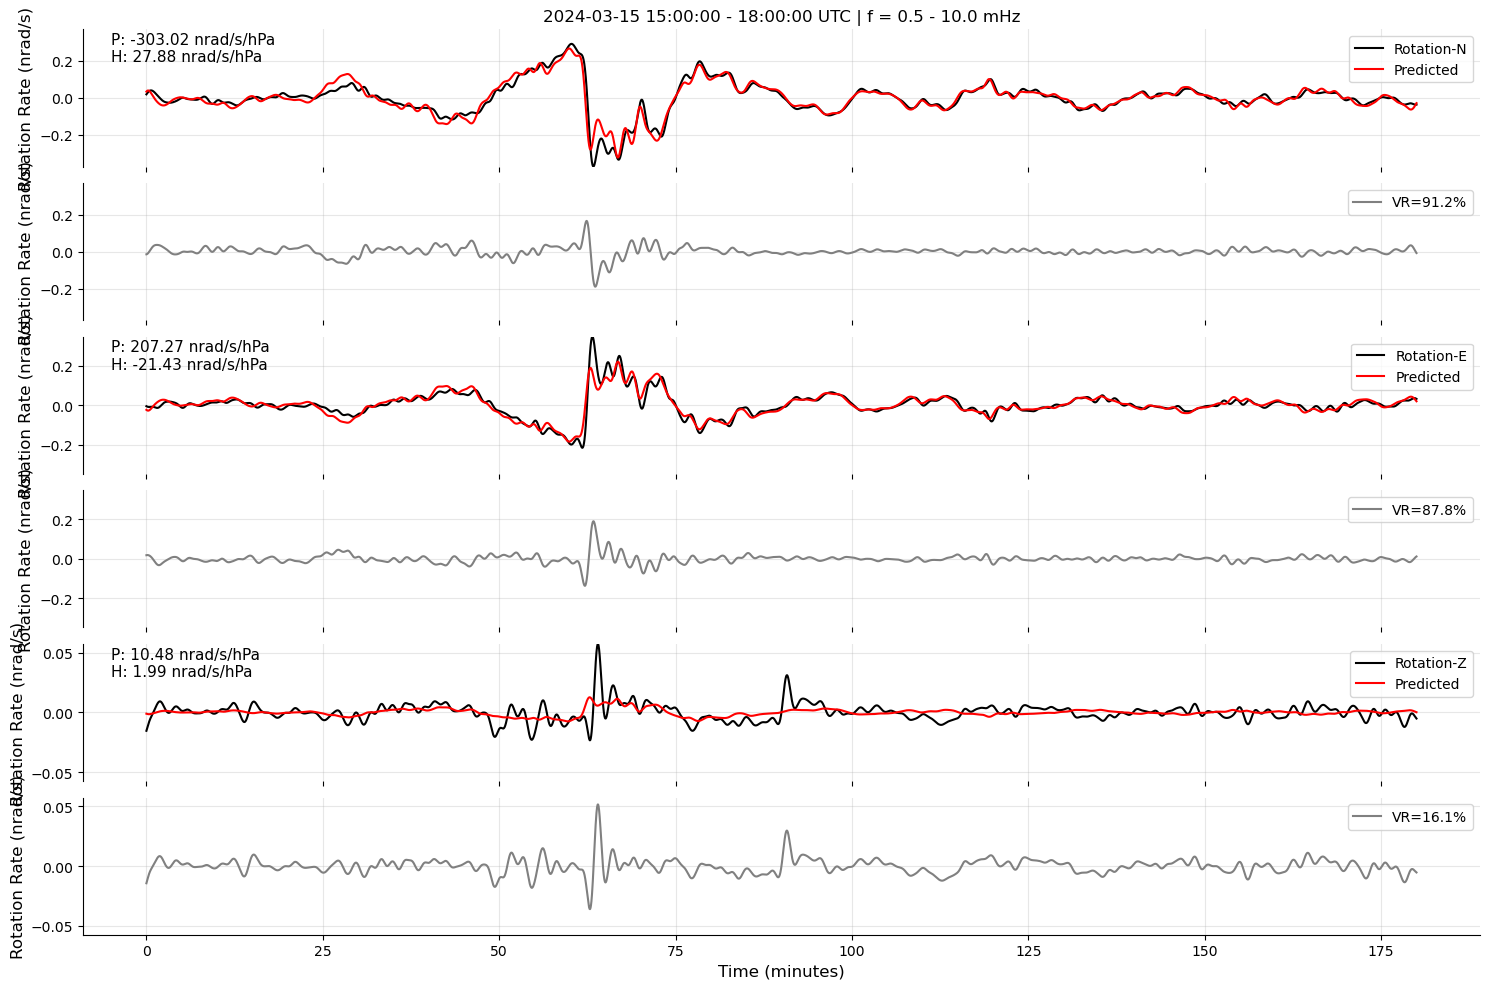

In [10]:
bs.predict_tilt_from_pressure(method="least_squares", channel_type="J")

fig = bs.plot_residuals(tunit="minutes", channel_type="J", out=True)

Make prediction for tilt


Component N:
P coefficient: 0.000 nrad/hPa
H coefficient: 0.000 nrad/hPa
Variance reduction: 81.1%

Component E:
P coefficient: 0.000 nrad/hPa
H coefficient: 0.000 nrad/hPa
Variance reduction: 81.7%

Component Z:
P coefficient: 0.000 nrad/hPa
H coefficient: -0.000 nrad/hPa
Variance reduction: 57.5%
12135.084141899299 59320.700183324814
8156.863928824214 39464.00265202053
464.55253545457856 -2867.7448577663013


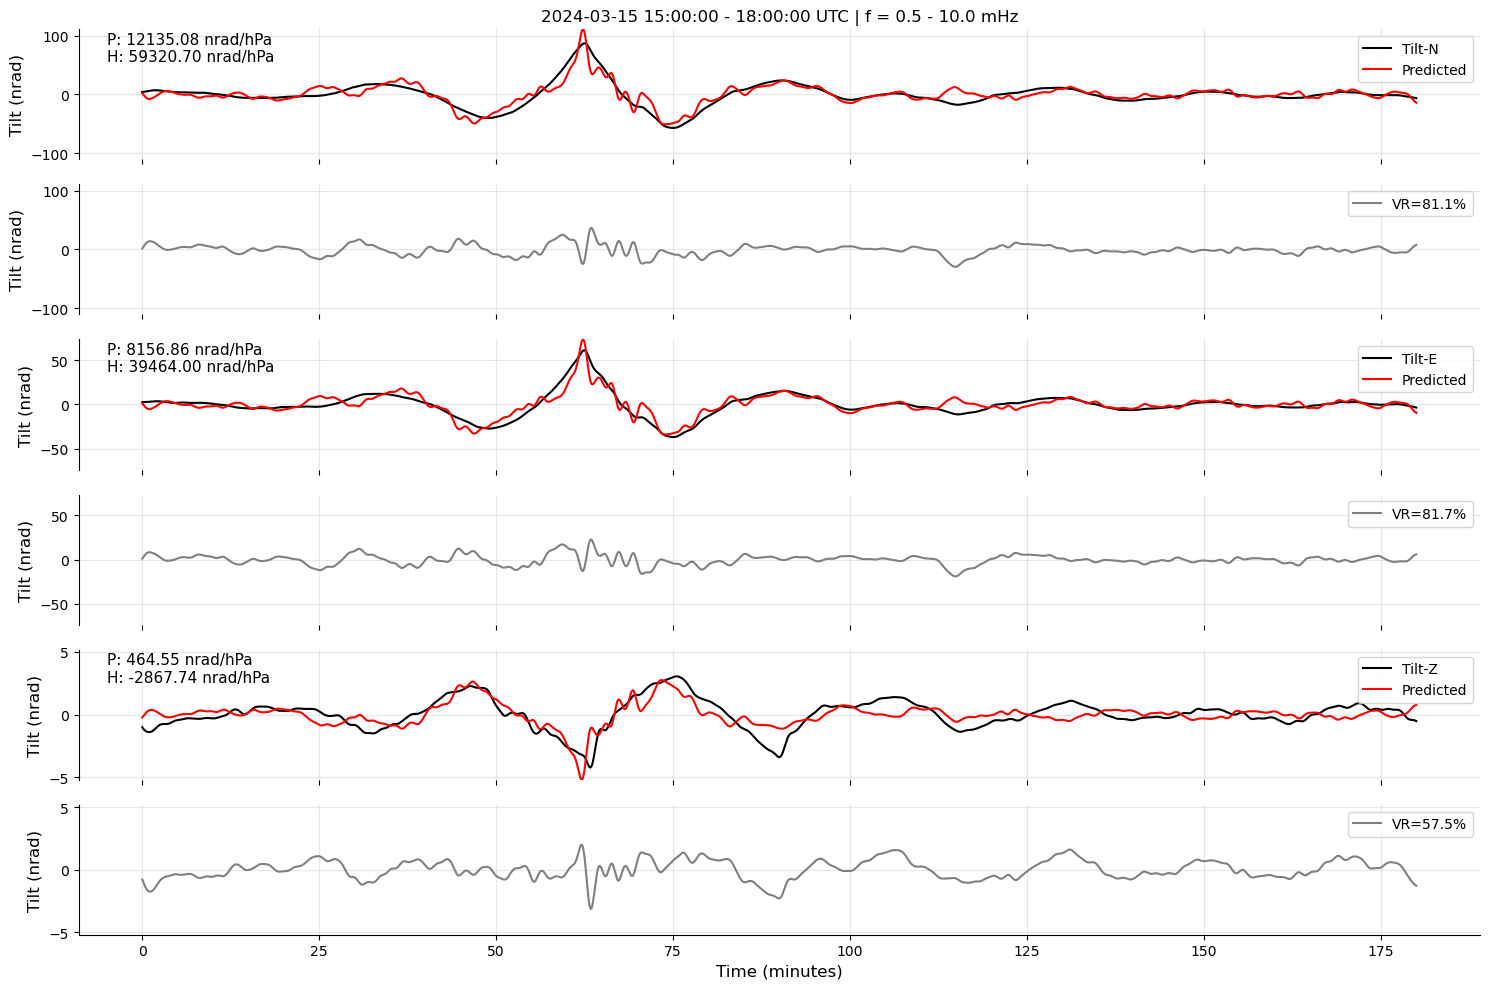

In [11]:
bs.predict_tilt_from_pressure(method="least_squares", channel_type="A")

fig = bs.plot_residuals(tunit="minutes", channel_type="A", out=True)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_tilt_residual_waveforms.png")

Make prediction for rotation rate using RANSAC regression


Component N:
R² Score: 0.9080
Coefficients: [-2.87772096e-09  1.86334387e-10]
P coefficient: -0.000 nrad/s/hPa
H coefficient: 0.000 nrad/s/hPa
Variance reduction: 90.8%

Component E:
R² Score: 0.8634
Coefficients: [ 1.79726148e-09 -2.47678499e-10]
P coefficient: 0.000 nrad/s/hPa
H coefficient: -0.000 nrad/s/hPa
Variance reduction: 86.3%

Component Z:
R² Score: 0.1106
Coefficients: [1.21168810e-10 7.21174591e-11]
P coefficient: 0.000 nrad/s/hPa
H coefficient: 0.000 nrad/s/hPa
Variance reduction: 11.1%
-287.77209606385685 18.633438656948677
179.72614816003255 -24.767849903994403
12.116881011979956 7.211745911974552


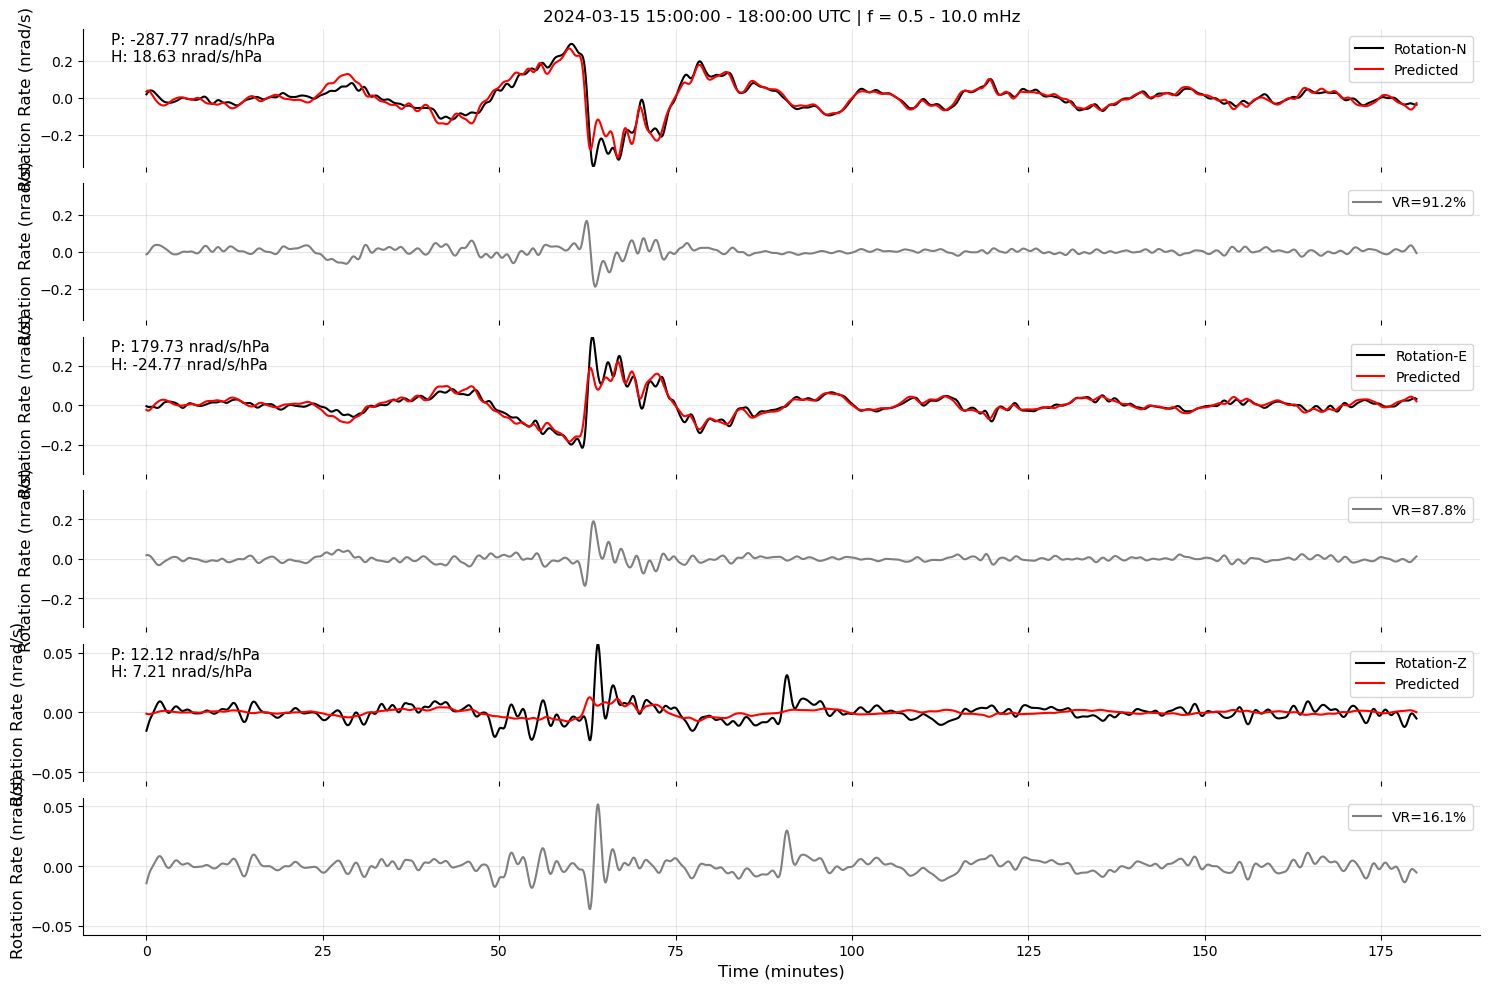

In [12]:
bs.predict_tilt_from_pressure(method="regression", reg_type="ransac", channel_type="J", zero_intercept=True)

fig = bs.plot_residuals(tunit="minutes", channel_type="J", out=True)

fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_rotation_rate_residual_waveforms.png")

Compare regression and least squares modelling

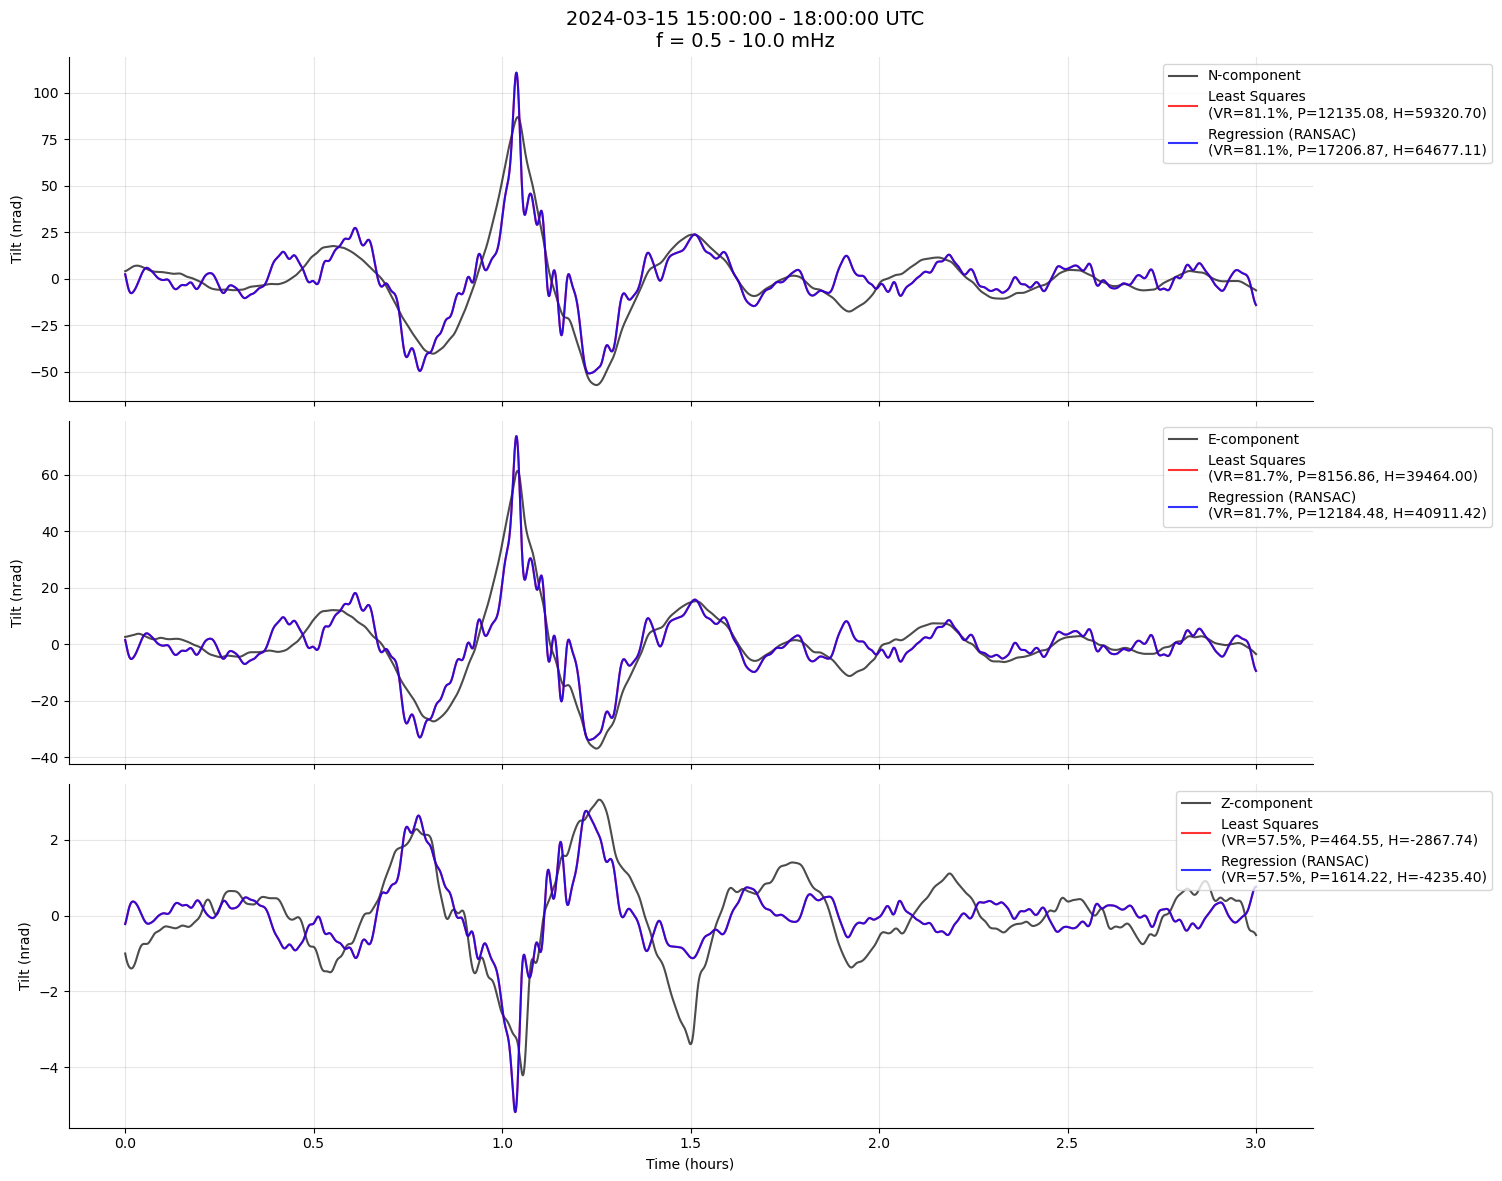

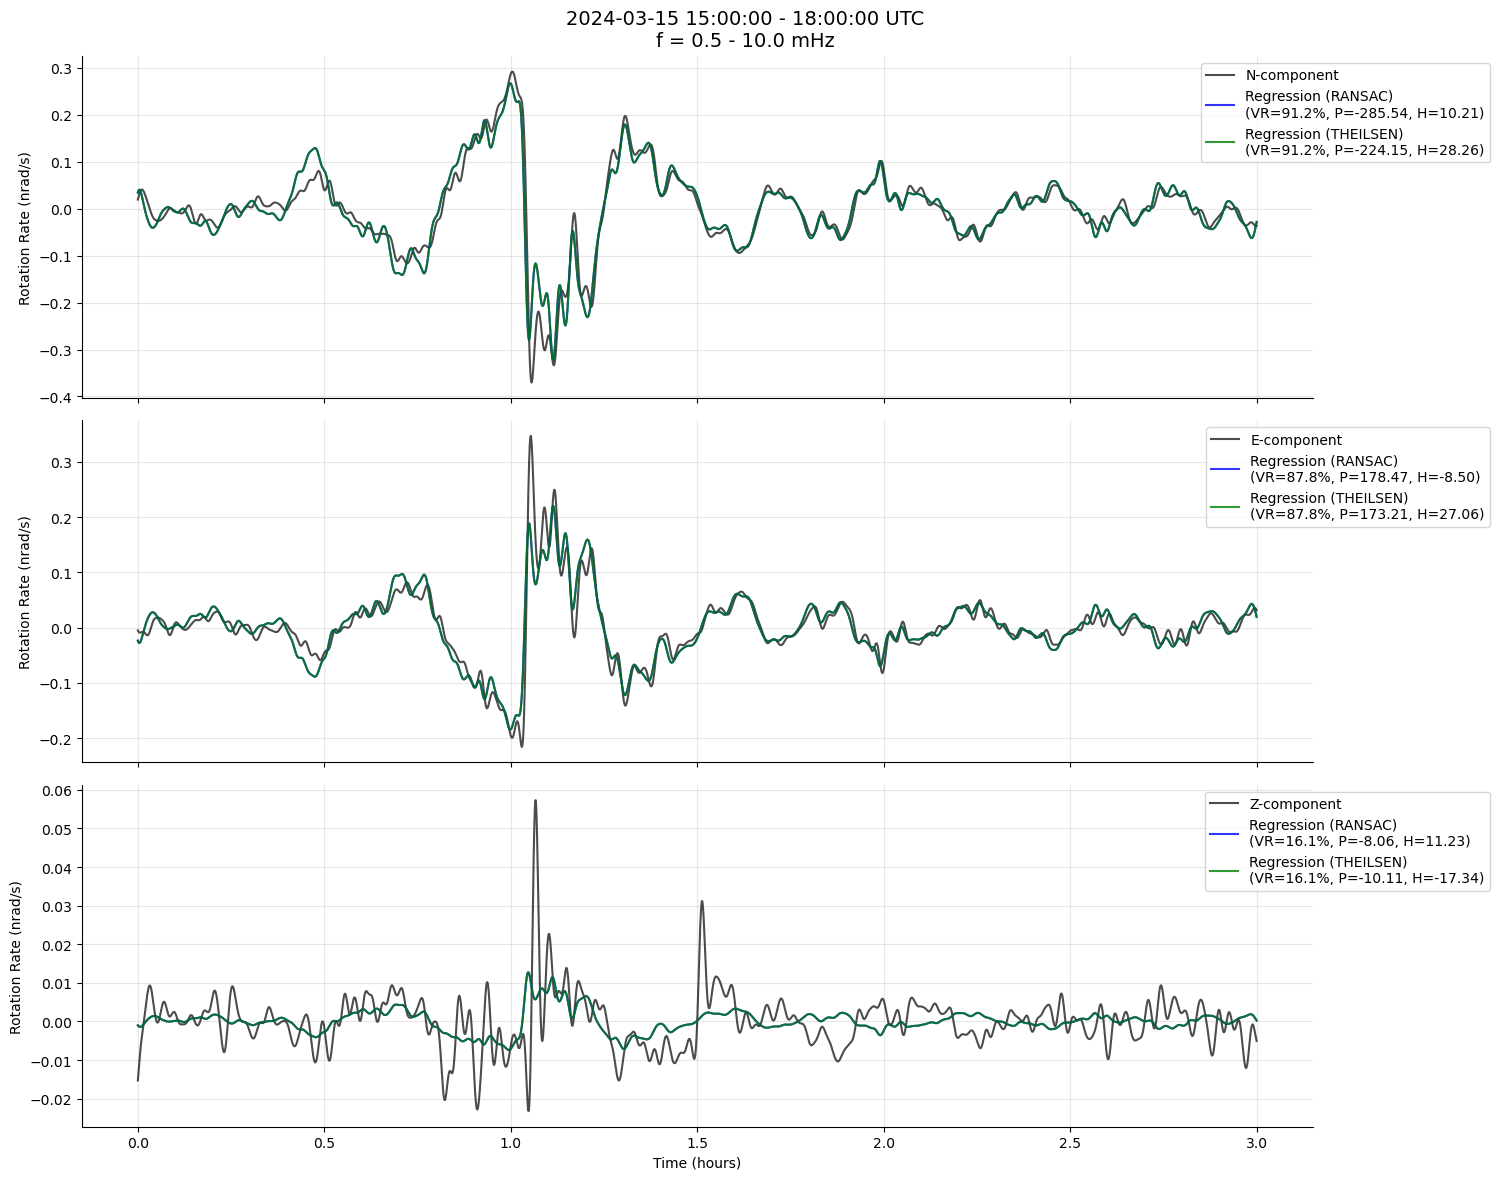

In [14]:
# Compare least squares vs RANSAC regression
bs.compare_prediction_methods(
    method1={'name': 'least_squares', 'reg_type': None, 'color': 'red'},
    method2={'name': 'regression', 'reg_type': 'ransac', 'color': 'blue'},
    channel_type='A'
)

# Compare RANSAC vs TheilSen regression
bs.compare_prediction_methods(
    method1={'name': 'regression', 'reg_type': 'ransac', 'color': 'blue'},
    method2={'name': 'regression', 'reg_type': 'theilsen', 'color': 'green'},
    channel_type='J'
)


Component N:
P coefficient: -0.000 nrad/s/hPa
H coefficient: 0.000 nrad/s/hPa
Variance reduction: 91.2%

Component E:
P coefficient: 0.000 nrad/s/hPa
H coefficient: -0.000 nrad/s/hPa
Variance reduction: 87.8%

Component Z:
P coefficient: 0.000 nrad/s/hPa
H coefficient: 0.000 nrad/s/hPa
Variance reduction: 16.1%


/home/andbro/cursorfiles/baroseis/functions/baroseis.py:1753: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


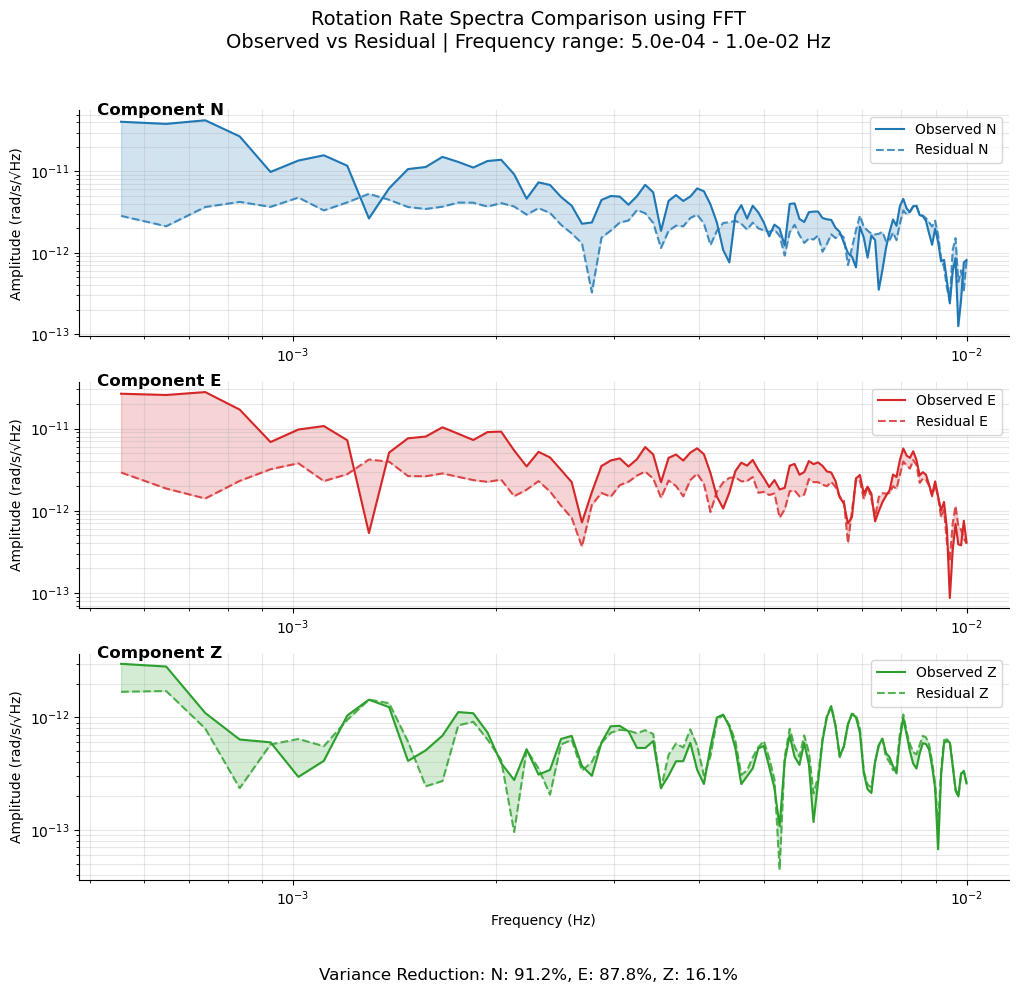

In [ ]:
bs.predict_tilt_from_pressure(method="least_squares", reg_type=None, channel_type="J")

fig = bs.compare_spectra(method='fft', channel_type='J', fmin=0.0005, fmax=0.01)

# fig.savefig(f"./figures/event_{bs.config['tbeg']}_{bs.config['tend']}_rotation_rate_residual_spectra.png")


In [16]:

# bs.predict_tilt_from_pressure(method="least_squares", reg_type=None, channel_type="A")

# fig = bs.compare_spectra(method='fft', channel_type='A', fmin=0.0005, fmax=0.01)


In [17]:
# bs.add_pressure_gradient(brmy_seed="BW.BRMY..BDE")

# bs.st.plot(equal_scale=False);